In [18]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

import tensorflow as tf
import gzip
import numpy as np

In [19]:
labels_map = {
  0: 'T-Shirt',
  1: 'Trouser',
  2: 'Pullover',
  3: 'Dress',
  4: 'Coat',
  5: 'Sandal',
  6: 'Shirt',
  7: 'Sneaker',
  8: 'Bag',
  9: 'Ankle Boot',
}

In [20]:
(training_images, training_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

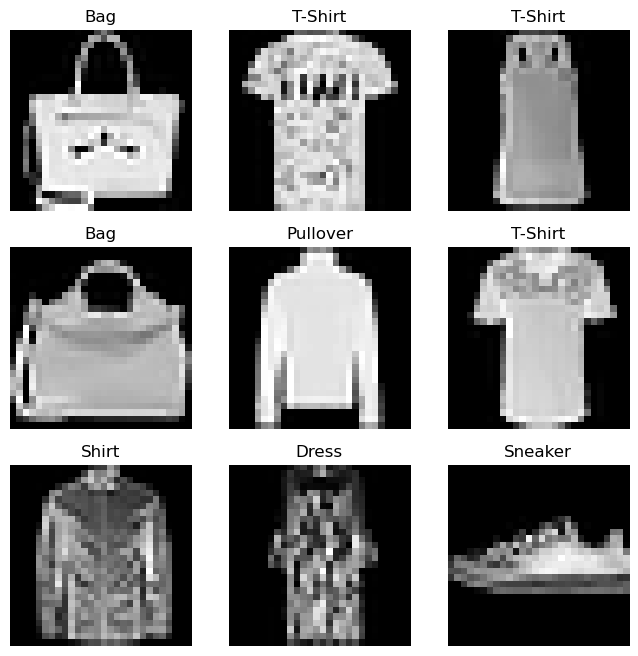

In [21]:
import random
import matplotlib.pyplot as plt

figure = plt.figure(figsize=(8, 8))
cols = 3
rows = 3
for i in range(1, cols * rows + 1):
  sample_idx = random.randint(0, len(training_images))
  image = training_images[sample_idx]
  label = training_labels[sample_idx]
  figure.add_subplot(rows, cols, i)
  plt.title(labels_map[label])
  plt.axis('off')
  plt.imshow(image.squeeze(), cmap='gray')
plt.show()


In [22]:
training_labels[0]

9

In [23]:
training_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [24]:
train_dataset = tf.data.Dataset.from_tensor_slices((training_images, training_labels))
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels))

In [34]:
train_dataset = train_dataset.map(lambda image, label: (float(image) / 255.0, label))
test_dataset = test_dataset.map(lambda image, label: (float(image) / 255.0, label))

In [36]:
train_dataset.as_numpy_iterator().next()[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [38]:
batch_size = 64
train_dataset = train_dataset.batch(batch_size).shuffle(500)
test_dataset = test_dataset.batch(batch_size).shuffle(500)

In [40]:
len(train_dataset.as_numpy_iterator().next()[0])

64

In [46]:
class NeuralNetwork(tf.keras.Model):
  def __init__(self):
    super(NeuralNetwork, self).__init__()
    self.sequence = tf.keras.Sequential([
      tf.keras.layers.Input(shape=(28, 28)),
      tf.keras.layers.Flatten(input_shape=(28, 28)),
      tf.keras.layers.Dense(20, activation='relu'),
      tf.keras.layers.Dense(10)
    ])

  def call(self, x: tf.Tensor) -> tf.Tensor:
    y_prime = self.sequence(x)
    return y_prime

In [48]:
model = NeuralNetwork()
model.build((1, 28, 28))
model.summary()

Model: "neural_network_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)       │ (None, 10)             │        15,910 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,910 (62.15 KB)

 Trainable params: 15,910 (62.15 KB)

 Non-trainable params: 0 (0.00 B)

In [50]:
from typing import Tuple

In [54]:
import urllib.request

# Download the file from the URL
url = "https://raw.githubusercontent.com/MicrosoftDocs/tensorflow-learning-path/main/intro-keras/kintro.py"
filename = "kintro.py"
urllib.request.urlretrieve(url, filename)

# Import the downloaded module
from kintro import *


In [62]:
learning_rate = 0.1
batch_size = 64

model = NeuralNetwork()

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.SGD(learning_rate)
metrics = ['accuracy']
model.compile(optimizer=optimizer, loss=loss_fn, metrics=metrics)

In [64]:
epochs = 5
print('\nFitting:')
model.fit(train_dataset, epochs=epochs)


Fitting:
Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7111 - loss: 0.8230
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 983us/step - accuracy: 0.8340 - loss: 0.4710
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 979us/step - accuracy: 0.8482 - loss: 0.4265
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 968us/step - accuracy: 0.8571 - loss: 0.4061
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 990us/step - accuracy: 0.8612 - loss: 0.3892


In [66]:
print('\nEvaluating:')
(test_loss, test_accuracy) = model.evaluate(test_dataset)
print(f'\nTest accuracy: {test_accuracy * 100:>0.1f}%, test loss: {test_loss:>8f}')


Evaluating:
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 872us/step - accuracy: 0.8483 - loss: 0.4246

Test accuracy: 84.7%, test loss: 0.430056


In [70]:
import requests
from PIL import Image

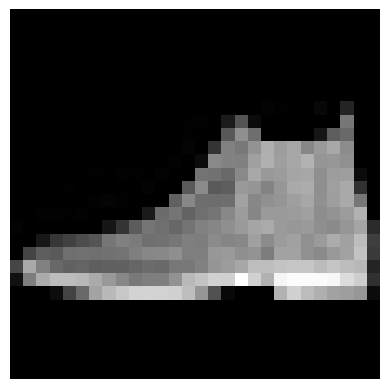

In [72]:
url = 'https://raw.githubusercontent.com/MicrosoftDocs/tensorflow-learning-path/main/intro-keras/predict-image.png'

with Image.open(requests.get(url, stream=True).raw) as image:
  X = np.asarray(image, dtype=np.float32).reshape((-1, 28, 28)) / 255.0

plt.figure()
plt.axis('off')
plt.imshow(X.squeeze(), cmap='gray')
plt.show()

In [74]:
predicted_vector = model.predict(X)
predicted_index = np.argmax(predicted_vector)
predicted_name = labels_map[predicted_index]

print(f'Predicted class: {predicted_name}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Predicted class: Ankle Boot


In [76]:
probs = tf.nn.softmax(predicted_vector.reshape((-1,)))
for i,p in enumerate(probs):
    print(f'{labels_map[i]} -> {p:.3f}')

T-Shirt -> 0.000
Trouser -> 0.000
Pullover -> 0.000
Dress -> 0.000
Coat -> 0.000
Sandal -> 0.035
Shirt -> 0.000
Sneaker -> 0.115
Bag -> 0.006
Ankle Boot -> 0.844
